In [1]:
#librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.metrics import silhouette_score, davies_bouldin_score

#!pip install scikit-learn-extra
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.cluster import MiniBatchKMeans
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import SpectralClustering

#!pip install bioinfokit
from bioinfokit.analys import stats
from scipy import stats

from matplotlib import projections
from mpl_toolkits.mplot3d import Axes3D


import pyodbc

## 01 Seleccion de datos

In [2]:
## Importando data inicial desde csv
# df=pd.read_csv("D:/xampp/py001_paptic/data/pap01.csv",sep=";")
# df
## Cursos disponibles de acompañatic
conn = pyodbc.connect(DRIVER = '{ODBC Driver 17 for SQL Server}',
                      SERVER = 'med000008646',
                      DATABASE = 'db_sifods',
                      UID = 'ussifods',
                      PWD = 'sifods')

df = pd.read_sql_query("select CANAL,CAMPUS,CURID,FULLNAME,IDNUMBER,NOMBRE_ACTIVIDAD,FECHA_REALIZADA,FINALGRADE from [acfm].[sistema.mooc_carga_actividad] where CANAL='PERUEDUCA' and CAMPUS=7  and CURID IN (37,24,23,28,42,43,2366,2367,2368,2369,2370,2371,2372,2373,2374,2375,2376,2377,2378,2379,2380,2381,2382,2383) and NOMBRE_ACTIVIDAD IN ('Cuestionario de entrada','Cuestionario de salida')",conn)
df.head(3)

,CANAL,CAMPUS,CURID,FULLNAME,IDNUMBER,NOMBRE_ACTIVIDAD,FECHA_REALIZADA,FINALGRADE
0,PERUEDUCA,7,2380,(Investigación e innovación educativa - Secund...,24952562,Cuestionario de entrada,NaT,NaN
1,PERUEDUCA,7,2380,(Investigación e innovación educativa - Secund...,43506319,Cuestionario de entrada,NaT,NaN
2,PERUEDUCA,7,2380,(Investigación e innovación educativa - Secund...,10602040,Cuestionario de entrada,NaT,NaN


In [14]:
# docentes = pd.read_csv("D:/xampp/py001_paptic/data/docentespap01.csv",sep=";")
# docentes
# Caracteristica de los docentes 
docentes = pd.read_sql_query("select DNI,NIVEL_NEXUS,DESCRIPCION_CARGO,SITUACION_LABORAL,EDAD,RANGO_EDAD,D_DPTO,D_PROV,D_DIST,D_DREUGEL,ESCALA_DIFODS,DAREACENSO from dct.[maestro.nexus_escale]",conn)
docentes.head(3)

,DNI,NIVEL_NEXUS,DESCRIPCION_CARGO,SITUACION_LABORAL,EDAD,RANGO_EDAD,D_DPTO,D_PROV,D_DIST,D_DREUGEL,ESCALA_DIFODS,DAREACENSO
0,00002991,Básica Especial-Inicial,PROFESOR,NOMBRADO,57.0,51-60,UCAYALI,CORONEL PORTILLO,CALLERIA,UGEL CORONEL PORTILLO,2,Urbana
1,00002408,Secundaria,PROFESOR,NOMBRADO,57.0,51-60,UCAYALI,CORONEL PORTILLO,CALLERIA,UGEL CORONEL PORTILLO,2,Urbana
2,00004612,Secundaria,PROFESOR,NOMBRADO,56.0,51-60,UCAYALI,CORONEL PORTILLO,CALLERIA,UGEL CORONEL PORTILLO,3,Urbana


## 02 Pré Procesamiento de datos 

In [15]:
#Eliminando datos duplicados
df = df.drop_duplicates()
df

,CANAL,CAMPUS,CURID,FULLNAME,IDNUMBER,NOMBRE_ACTIVIDAD,FECHA_REALIZADA,FINALGRADE
9,PERUEDUCA,7,2380,(Investigación e innovación educativa - Secund...,19900744.0,Cuestionario de entrada,2022-09-11 09:50:58,18.0
11,PERUEDUCA,7,2380,(Investigación e innovación educativa - Secund...,23271636.0,Cuestionario de entrada,2022-08-09 21:20:58,8.0
12,PERUEDUCA,7,2380,(Investigación e innovación educativa - Secund...,23276967.0,Cuestionario de entrada,2022-08-09 01:00:17,0.0
20,PERUEDUCA,7,2380,(Investigación e innovación educativa - Secund...,22518697.0,Cuestionario de entrada,2022-08-23 19:59:50,20.0
25,PERUEDUCA,7,2380,(Investigación e innovación educativa - Secund...,70212168.0,Cuestionario de entrada,2022-08-29 09:31:11,16.0
...,...,...,...,...,...,...,...,...
651642,PERUEDUCA,7,23,Educación híbrida para el desarrollo de compet...,17448118.0,Cuestionario de entrada,2022-07-31 22:45:57,18.0
651646,PERUEDUCA,7,23,Educación híbrida para el desarrollo de compet...,42423098.0,Cuestionario de entrada,2022-06-27 10:45:52,18.0
651648,PERUEDUCA,7,23,Educación híbrida para el desarrollo de compet...,42423098.0,Cuestionario de salida,2022-06-27 10:51:34,18.0
651651,PERUEDUCA,7,23,Educación híbrida para el desarrollo de compet...,47147692.0,Cuestionario de salida,2022-06-27 10:51:34,16.0


In [16]:
df['IDNUMBER']=pd.to_numeric(df['IDNUMBER'], errors='coerce')

In [17]:
df=df.dropna()
df.isnull().sum()
df.shape

(240784, 8)

In [18]:
#from ast import Index
tdf = df.loc[:,['CURID','IDNUMBER','NOMBRE_ACTIVIDAD','FINALGRADE']]

tdf_pivot = pd.pivot_table(tdf,index=['CURID','IDNUMBER'],columns='NOMBRE_ACTIVIDAD', values='FINALGRADE').reset_index()
tdf_pivot.head(10) 

NOMBRE_ACTIVIDAD,CURID,IDNUMBER,Cuestionario de entrada,Cuestionario de salida
0,23,82694.0,16.0,NaN
1,23,93730.0,18.0,NaN
2,23,100513.0,14.0,NaN
3,23,116632.0,20.0,14.0
4,23,119082.0,20.0,20.0
5,23,125051.0,18.0,20.0
6,23,445512.0,8.0,20.0
7,23,446097.0,6.0,14.0
8,23,446379.0,10.0,20.0
9,23,446411.0,10.0,20.0


In [19]:
# Reemplazando valores nulos
tdf_pivot["Cuestionario de entrada"] = tdf_pivot["Cuestionario de entrada"].fillna(0)
tdf_pivot["Cuestionario de salida"] = tdf_pivot["Cuestionario de salida"].fillna(0)

In [20]:
tdf_pivot.shape

(128352, 4)

In [24]:
tdf_pivot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128352 entries, 0 to 128351
Data columns (total 4 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   CURID                    128352 non-null  int64  
 1   IDNUMBER                 128352 non-null  float64
 2   Cuestionario de entrada  128352 non-null  float64
 3   Cuestionario de salida   128352 non-null  float64
dtypes: float64(3), int64(1)
memory usage: 3.9 MB


In [25]:
docentes['DNI']=pd.to_numeric(docentes['DNI'], errors='coerce')

In [27]:
dataf_1 = tdf_pivot.merge(docentes , how='left', left_on='IDNUMBER', right_on='DNI' )

In [30]:
#Diccionario de niveles de los cursos 
#agregar los nuevos cursos con el curid de sus respectivos niveles
diccionario_cursos = {37 : 1 ,24 : 1,23 : 1 ,28 : 1 ,42 : 1 ,43 : 1 ,
                        2366 : 2,2367 : 2,2368 : 2,2369 : 2,2370 : 2,2371 : 2,
                        2372 : 3 ,2373 : 3 ,2374 : 3 ,2375 : 3 ,2376 : 3 ,2377 : 3,
                        2378 : 4 ,2379 : 4 ,2380 : 4 ,2381 : 4 ,2382 : 4 ,2383: 4}

In [31]:
dataf_1['G_CURSOS'] = dataf_1['CURID'].map(diccionario_cursos)
dataf_1.head()

,CURID,IDNUMBER,Cuestionario de entrada,Cuestionario de salida,DNI,NIVEL_NEXUS,DESCRIPCION_CARGO,SITUACION_LABORAL,EDAD,RANGO_EDAD,D_DPTO,D_PROV,D_DIST,D_DREUGEL,ESCALA_DIFODS,DAREACENSO,G_CURSOS
0,23,82694.0,16.0,0.0,82694.0,Secundaria,PROFESOR,CONTRATADO,55.0,51-60,HUANUCO,PUERTO INCA,TOURNAVISTA,UGEL PUERTO INCA,1,Rural,1
1,23,93730.0,18.0,0.0,93730.0,Secundaria,PROFESOR,CONTRATADO,50.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1,Rural,1
2,23,100513.0,14.0,0.0,100513.0,Secundaria,PROFESOR,CONTRATADO,49.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1,Rural,1
3,23,116632.0,20.0,14.0,116632.0,Secundaria,PROFESOR CON FUNCIONES DE COORDINADOR PEDAGOGI...,NOMBRADO,46.0,41-50,PUNO,CHUCUITO,POMATA,UGEL CHUCUITO,1,Rural,1
4,23,119082.0,20.0,20.0,119082.0,Secundaria,PROFESOR,CONTRATADO,48.0,41-50,JUNIN,SATIPO,RIO TAMBO,UGEL RIO TAMBO,1,Rural,1


## 03 Transformación

In [32]:
dataf_1.isnull().sum()

CURID                          0
IDNUMBER                       0
Cuestionario de entrada        0
Cuestionario de salida         0
DNI                         9270
NIVEL_NEXUS                 9270
DESCRIPCION_CARGO           9270
SITUACION_LABORAL           9270
EDAD                        9270
RANGO_EDAD                  9270
D_DPTO                      9270
D_PROV                      9270
D_DIST                      9270
D_DREUGEL                   9270
ESCALA_DIFODS              14340
DAREACENSO                  9270
G_CURSOS                       0
dtype: int64

In [33]:
# Reemplazar los valores null de la columna ESCALA DIFODS por el valor -1 
dataf_1['ESCALA_DIFODS']=dataf_1['ESCALA_DIFODS'].fillna(-1)
dataf_1=dataf_1.dropna()


In [34]:
dataf_1.isnull().sum()

CURID                      0
IDNUMBER                   0
Cuestionario de entrada    0
Cuestionario de salida     0
DNI                        0
NIVEL_NEXUS                0
DESCRIPCION_CARGO          0
SITUACION_LABORAL          0
EDAD                       0
RANGO_EDAD                 0
D_DPTO                     0
D_PROV                     0
D_DIST                     0
D_DREUGEL                  0
ESCALA_DIFODS              0
DAREACENSO                 0
G_CURSOS                   0
dtype: int64

In [35]:
# print(df["DESCRIPCION_CARGO"].value_counts())
# print("")
# print(df["SITUACION_LABORAL"].value_counts())
# print("")
# print(df["ESCALA_DIFODS"].value_counts())
# print("")
# print(df["DAREACENSO"].value_counts())
print(dataf_1["NIVEL_NEXUS"].value_counts())

Primaria                          68240
Secundaria                        50711
Básica Alternativa-Avanzado          90
Inicial - Jardín                     34
Básica Alternativa-Inicial e I        4
Básica Especial-Primaria              3
Name: NIVEL_NEXUS, dtype: int64


In [36]:
# Reclasificando variables
dataf_1['NIVEL_NEXUS'] = np.where(dataf_1['NIVEL_NEXUS'] =='Inicial - Jardín',1, np.where(dataf_1['NIVEL_NEXUS'] =='Primaria',2,np.where(dataf_1['NIVEL_NEXUS'] =='Secundaria',3,4)))
dataf_1['DAREACENSO'] = np.where(dataf_1['DAREACENSO'] == 'Rural', 1 , 2)
dataf_1

,CURID,IDNUMBER,Cuestionario de entrada,Cuestionario de salida,DNI,NIVEL_NEXUS,DESCRIPCION_CARGO,SITUACION_LABORAL,EDAD,RANGO_EDAD,D_DPTO,D_PROV,D_DIST,D_DREUGEL,ESCALA_DIFODS,DAREACENSO,G_CURSOS
0,23,82694.0,16.0,0.0,82694.0,3,PROFESOR,CONTRATADO,55.0,51-60,HUANUCO,PUERTO INCA,TOURNAVISTA,UGEL PUERTO INCA,1,1,1
1,23,93730.0,18.0,0.0,93730.0,3,PROFESOR,CONTRATADO,50.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1,1,1
2,23,100513.0,14.0,0.0,100513.0,3,PROFESOR,CONTRATADO,49.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1,1,1
3,23,116632.0,20.0,14.0,116632.0,3,PROFESOR CON FUNCIONES DE COORDINADOR PEDAGOGI...,NOMBRADO,46.0,41-50,PUNO,CHUCUITO,POMATA,UGEL CHUCUITO,1,1,1
4,23,119082.0,20.0,20.0,119082.0,3,PROFESOR,CONTRATADO,48.0,41-50,JUNIN,SATIPO,RIO TAMBO,UGEL RIO TAMBO,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128347,2381,80631767.0,8.0,0.0,80631767.0,3,PROFESOR,NOMBRADO,43.0,41-50,HUANUCO,PACHITEA,CHAGLLA,UGEL PACHITEA,2,1,4
128348,2381,80631919.0,18.0,0.0,80631919.0,3,PROFESOR,NOMBRADO,43.0,41-50,HUANUCO,HUANUCO,SAN PABLO DE PILLAO,UGEL HUÁNUCO,4,1,4
128349,2381,80661331.0,10.0,18.0,80661331.0,3,PROFESOR,CONTRATADO,43.0,41-50,PIURA,AYABACA,FRIAS,UGEL CHULUCANAS,1,1,4
128350,2381,80662736.0,20.0,0.0,80662736.0,3,PROFESOR,NOMBRADO,42.0,41-50,PIURA,MORROPON,CHALACO,UGEL MORROPÓN,2,1,4


In [37]:
dataf_1.columns

Index(['CURID', 'IDNUMBER', 'Cuestionario de entrada',
       'Cuestionario de salida', 'DNI', 'NIVEL_NEXUS', 'DESCRIPCION_CARGO',
       'SITUACION_LABORAL', 'EDAD', 'RANGO_EDAD', 'D_DPTO', 'D_PROV', 'D_DIST',
       'D_DREUGEL', 'ESCALA_DIFODS', 'DAREACENSO', 'G_CURSOS'],
      dtype='object')

In [49]:
cursos=df[['CURID','FULLNAME']]
cursos=cursos.drop_duplicates()
dataf_2 = dataf_1.merge(cursos, how='left', left_on='CURID', right_on='CURID')
print('Numero Total de Registros de la Data Final : ' + str(dataf_2.shape))
dataf_2.head(3)

Numero Total de Registros de la Data Final : (119082, 18)


,CURID,IDNUMBER,Cuestionario de entrada,Cuestionario de salida,DNI,NIVEL_NEXUS,DESCRIPCION_CARGO,SITUACION_LABORAL,EDAD,RANGO_EDAD,D_DPTO,D_PROV,D_DIST,D_DREUGEL,ESCALA_DIFODS,DAREACENSO,G_CURSOS,FULLNAME
0,23,82694.0,16.0,0.0,82694.0,3,PROFESOR,CONTRATADO,55.0,51-60,HUANUCO,PUERTO INCA,TOURNAVISTA,UGEL PUERTO INCA,1,1,1,Educación híbrida para el desarrollo de compet...
1,23,93730.0,18.0,0.0,93730.0,3,PROFESOR,CONTRATADO,50.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1,1,1,Educación híbrida para el desarrollo de compet...
2,23,100513.0,14.0,0.0,100513.0,3,PROFESOR,CONTRATADO,49.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1,1,1,Educación híbrida para el desarrollo de compet...


## 04 Mineria de datos

In [51]:
# función para buscar el optimó numero de codo
def grafico_codo(data_scaled):
  range_n_clusters = range(1, 11)
  inertias = []

  for n_clusters in range_n_clusters:
      modelo_kmeans = KMeans(n_clusters = n_clusters, n_init = 20, random_state = 123)
      modelo_kmeans.fit(X=data_scaled)
      inertias.append(modelo_kmeans.inertia_)

  fig, ax = plt.subplots(1, 1)
  ax.plot(range_n_clusters, inertias, marker='o')
  ax.set_title("Número Óptimo de Cluster")
  ax.set_xlabel('Número clusters')
  plt.show()

# función para prueba de normalidad
def prueba_normalidad(datos, data_scaled):

  df_swt = pd.DataFrame(index=['Estadístico de la prueba', 'p-value'])

  for i, k in enumerate(datos.keys()):
    (swt, swp) = stats.normaltest(data_scaled[:,i])
    df_swt[k] = [float("{:.4f}".format(swt)), float("{:.4f}".format(swp))]
    
  display(df_swt)

#Función grafico de cluster dos variables
def grafico_cluster_principal(datos, c1, c2):
  y = datos['clusters']
  plt.figure(figsize=(15, 15))
  fig, ax = plt.subplots()
  sc = ax.scatter(datos[c1], datos[c2],c=y)
  ax.legend(*sc.legend_elements(), title='Grupos')
  plt.xlabel(c1,size=14)
  plt.ylabel(c2,size=14)
  #plt.axis("equal")
  plt.title('Clusterización K-means(k=4)', size=18)
  plt.show()

# Función grafico de cluster tres variables
def grafico_cluster_3d(datos,x,y,z):
    y1 = datos['clusters']
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111,projection='3d')
    ax.view_init(15, 40)
    plt.xlabel(x,size= 14)
    plt.ylabel(y,size= 14)
    plt.title("Clusterización K-means(k=4)",size= 20)
    sc = ax.scatter(datos[x],datos[y],datos[z],c=y1)
    ax.legend(*sc.legend_elements(), title='Grupos')
    plt.show()

# Funcion para calcular prueba de kruskall_wallis , prueba de diferencia de grupos
def kruskal_wallis(datos):
  df_kwt = pd.DataFrame(index=['Estadístico de la prueba', 'p-value'])
  var1 = ['NIVEL_NEXUS','EDAD','ESCALA_DIFODS','DAREACENSO','Cuestionario de entrada','Cuestionario de salida']
  for c in var1:
    datos_grupo1_temp  = datos.loc[datos['clusters']==1][c].values
    datos_grupo2_temp  = datos.loc[datos['clusters']==2][c].values
    datos_grupo3_temp  = datos.loc[datos['clusters']==3][c].values
    datos_grupo4_temp  = datos.loc[datos['clusters']==4][c].values

    (stkw, pvkw) = stats.kruskal(datos_grupo1_temp, datos_grupo2_temp, datos_grupo3_temp, datos_grupo4_temp)

    df_kwt[c] = [float("{:.4f}".format(stkw)), float("{:.4f}".format(pvkw))]
  display(df_kwt)

# funcion para comparar el numero de cluster
def comparar_clusters(data_scaled):
   for i in range(3,7) :
    predicted_clusters_kmeans = KMeans(n_clusters=i, random_state=1).fit_predict(X=data_scaled)
    davies_bouldin_score_kmeans = davies_bouldin_score(data_scaled, predicted_clusters_kmeans)
    silhouette_score_kmeans = silhouette_score(data_scaled, predicted_clusters_kmeans)

    predicted_clusters_miniba = MiniBatchKMeans(n_clusters=i, random_state=2).fit_predict(X=data_scaled)
    davies_bouldin_score_miniba = davies_bouldin_score(data_scaled, predicted_clusters_miniba)
    silhouette_score_miniba = silhouette_score(data_scaled, predicted_clusters_miniba)

    result_comp_clusters = pd.DataFrame(index=['Índice de Davies-Bouldin', 'Índice de Silhouette'])
    result_comp_clusters['K-means'] = [davies_bouldin_score_kmeans, silhouette_score_kmeans]
    result_comp_clusters['MiniBatchKM'] = [davies_bouldin_score_miniba, silhouette_score_miniba]
    display(result_comp_clusters)

def analisis_resultados(datosini,data_norm):
    var2 = ['NIVEL_NEXUS','EDAD','ESCALA_DIFODS','DAREACENSO','Cuestionario de entrada','Cuestionario de salida']
    # los resultados del modelo se guardan en labels_ dentro del modelo mod_clus01
    predicted_clusters_kmeans = KMeans(n_clusters=4, random_state=1).fit_predict(X=data_norm)
    datosini['clusters'] = predicted_clusters_kmeans + 1
    gr1 = datosini.groupby('clusters').agg(N = ("clusters", 'count'))
    #gr2 = gr1.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
    display(gr1)
    #datosini['clusters'].value_counts()

    # Prueba de normalidad de var2
    prueba_normalidad( datosini.loc[:,var2],data_norm)

    # Prueba no parametrica de diferencia de grupos
    kruskal_wallis(datosini)

    # Visualizar grafico 2 var2
    grafico_cluster_principal(datosini, 'Cuestionario de entrada', 'Cuestionario de salida')

    # Visualizar grafico 3 var2
    grafico_cluster_3d(datosini,'EDAD','Cuestionario de entrada','Cuestionario de salida')

# función para ver la correlacion de las variables
def plot_corr_v2(df):
    fig=plt.figure(figsize=(18,10))
    sns.heatmap(df.corr(),annot=True)
    plt.tight_layout()

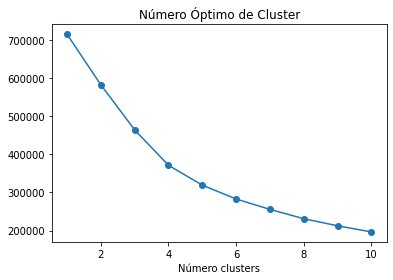

,K-means,MiniBatchKM
Índice de Davies-Bouldin,1.312564,1.480548
Índice de Silhouette,0.261938,0.266663


,K-means,MiniBatchKM
Índice de Davies-Bouldin,1.158898,1.19861
Índice de Silhouette,0.300882,0.27938


,K-means,MiniBatchKM
Índice de Davies-Bouldin,1.192654,1.351747
Índice de Silhouette,0.270727,0.290100


,K-means,MiniBatchKM
Índice de Davies-Bouldin,1.165228,1.191214
Índice de Silhouette,0.264968,0.259392


In [52]:
# Seleccion de variables y normalización 
# StandardScaler().fit_transform(datos)
variables = ['IDNUMBER','NIVEL_NEXUS','EDAD','ESCALA_DIFODS','DAREACENSO','Cuestionario de entrada','Cuestionario de salida']


dataf_2_norm = StandardScaler().fit_transform(dataf_2.loc[:,variables].drop('IDNUMBER',axis=1))


grafico_codo(dataf_2_norm)
comparar_clusters(dataf_2_norm)


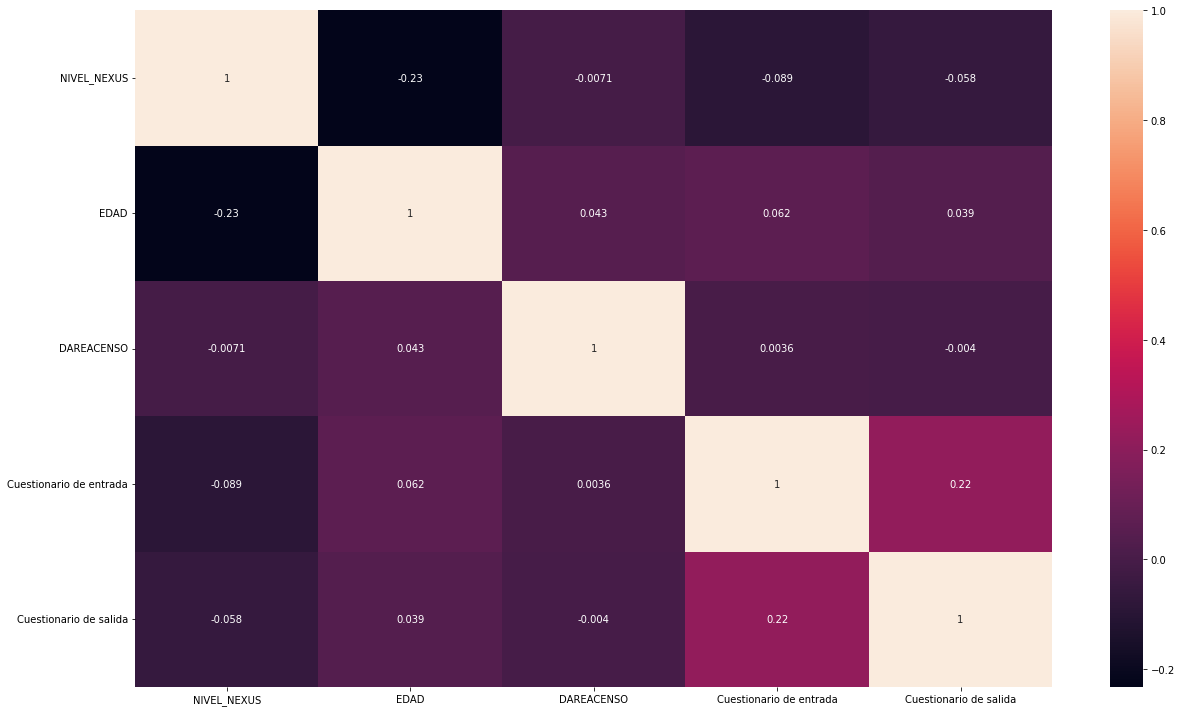

In [53]:
plot_corr_v2(dataf_2.loc[:,variables].drop('IDNUMBER',axis=1))

## 05 Interpretación y análisis

In [54]:
# Análiss de resultados de los cluster 
analisis_resultados(dataf_2,dataf_2_norm)


,N
clusters,
1,14882
2,59068
3,42937
4,2195


,NIVEL_NEXUS,EDAD,ESCALA_DIFODS,DAREACENSO,Cuestionario de entrada,Cuestionario de salida
Estadístico de la prueba,454322.8525,4241.4386,13279.6984,148031.6678,11761.3814,40027.4051
p-value,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


TypeError: '<' not supported between instances of 'int' and 'str'

In [55]:
dataf_2.head()

,CURID,IDNUMBER,Cuestionario de entrada,Cuestionario de salida,DNI,NIVEL_NEXUS,DESCRIPCION_CARGO,SITUACION_LABORAL,EDAD,RANGO_EDAD,D_DPTO,D_PROV,D_DIST,D_DREUGEL,ESCALA_DIFODS,DAREACENSO,G_CURSOS,FULLNAME,clusters
0,23,82694.0,16.0,0.0,82694.0,3,PROFESOR,CONTRATADO,55.0,51-60,HUANUCO,PUERTO INCA,TOURNAVISTA,UGEL PUERTO INCA,1,1,1,Educación híbrida para el desarrollo de compet...,1
1,23,93730.0,18.0,0.0,93730.0,3,PROFESOR,CONTRATADO,50.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1,1,1,Educación híbrida para el desarrollo de compet...,1
2,23,100513.0,14.0,0.0,100513.0,3,PROFESOR,CONTRATADO,49.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1,1,1,Educación híbrida para el desarrollo de compet...,1
3,23,116632.0,20.0,14.0,116632.0,3,PROFESOR CON FUNCIONES DE COORDINADOR PEDAGOGI...,NOMBRADO,46.0,41-50,PUNO,CHUCUITO,POMATA,UGEL CHUCUITO,1,1,1,Educación híbrida para el desarrollo de compet...,3
4,23,119082.0,20.0,20.0,119082.0,3,PROFESOR,CONTRATADO,48.0,41-50,JUNIN,SATIPO,RIO TAMBO,UGEL RIO TAMBO,1,1,1,Educación híbrida para el desarrollo de compet...,3


In [56]:
dataf_2.groupby(['clusters'],as_index=True)["clusters"].count()


clusters
1    14882
2    59068
3    42937
4     2195
Name: clusters, dtype: int64

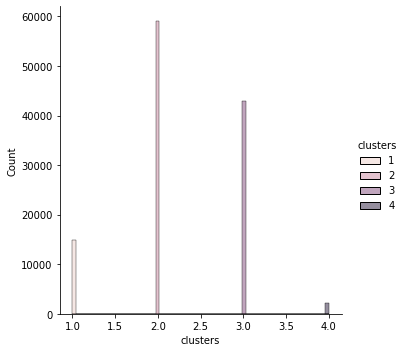

In [57]:
sns.displot(dataf_2, x = 'clusters', hue= 'clusters')

In [64]:
dataf_2.head()

,CURID,IDNUMBER,Cuestionario de entrada,Cuestionario de salida,DNI,NIVEL_NEXUS,DESCRIPCION_CARGO,SITUACION_LABORAL,EDAD,RANGO_EDAD,D_DPTO,D_PROV,D_DIST,D_DREUGEL,ESCALA_DIFODS,DAREACENSO,G_CURSOS,FULLNAME,clusters
0,23,82694.0,16.0,0.0,82694.0,3,PROFESOR,CONTRATADO,55.0,51-60,HUANUCO,PUERTO INCA,TOURNAVISTA,UGEL PUERTO INCA,1,1,1,Educación híbrida para el desarrollo de compet...,1
1,23,93730.0,18.0,0.0,93730.0,3,PROFESOR,CONTRATADO,50.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1,1,1,Educación híbrida para el desarrollo de compet...,1
2,23,100513.0,14.0,0.0,100513.0,3,PROFESOR,CONTRATADO,49.0,41-50,HUANUCO,PUERTO INCA,HONORIA,UGEL PUERTO INCA,1,1,1,Educación híbrida para el desarrollo de compet...,1
3,23,116632.0,20.0,14.0,116632.0,3,PROFESOR CON FUNCIONES DE COORDINADOR PEDAGOGI...,NOMBRADO,46.0,41-50,PUNO,CHUCUITO,POMATA,UGEL CHUCUITO,1,1,1,Educación híbrida para el desarrollo de compet...,3
4,23,119082.0,20.0,20.0,119082.0,3,PROFESOR,CONTRATADO,48.0,41-50,JUNIN,SATIPO,RIO TAMBO,UGEL RIO TAMBO,1,1,1,Educación híbrida para el desarrollo de compet...,3


In [67]:
dataf_2.to_csv("D:/difods/py001_paptic/data/output_cluster.csv")